In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud , ImageColorGenerator

In [3]:
data = pd.read_csv("/content/indian_food.csv")

In [7]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [8]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [10]:
data.isnull().any()

name              False
ingredients       False
diet              False
prep_time         False
cook_time         False
flavor_profile    False
course            False
state             False
region             True
dtype: bool

In [11]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [12]:
data=data.replace(-1,np.nan)
data=data.replace('-1',np.nan)

In [13]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [18]:
data.isnull().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [15]:
data.shape

(255, 9)

In [16]:
pie_data = data.diet.value_counts().reset_index()

In [17]:
pie_data.columns = ['diet','count']
fig = px.pie(pie_data, values='count', names='diet', title='Proportion of Vegetarian and Non-Vegetarian dishes',
             color_discrete_sequence=['green', 'red'])
fig.show()

In [19]:
 sweet_data = data[data['flavor_profile']=='sweet']
final_sweet_data = sweet_data[sweet_data['course']!='dessert']


In [20]:
final_sweet_data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180.0,60.0,sweet,main course,Karnataka,South
85,Dal makhani,"Red kidney beans, urad dal, cream, garam masal...",vegetarian,10.0,60.0,sweet,main course,Punjab,North
243,Mishti Chholar Dal,"Chana dal, fresh coconut, ginger, cinnamon, ra...",vegetarian,10.0,30.0,sweet,main course,West Bengal,East


In [21]:
flav_data = data.flavor_profile.value_counts().reset_index()
flav_data.columns = ['flavor_profile', 'prep_time']
fig = px.bar(flav_data,x='flavor_profile',y='prep_time',title='variety of item according to the flavour',
color_discrete_sequence=['green'])
fig.show()


In [22]:
cooking_time= data[['cook_time','name']]

In [23]:
cooking_time.head()

,cook_time,name
0,25.0,Balu shahi
1,30.0,Boondi
2,60.0,Gajar ka halwa
3,30.0,Ghevar
4,40.0,Gulab jamun


In [24]:
cooking_time=cooking_time.sort_values(['cook_time'],ascending=True)

In [25]:
ten_cook_quickly=cooking_time.head(10)

In [ ]:
#cook_data = ten_cook_quickly.cook_time.value_counts().reset_index()

In [26]:
#cook_data.columns = ['cook_time', 'name']
fig = px.bar(ten_cook_quickly,x='cook_time',y='name',title='dishes based on cooking time',
color_discrete_sequence=['green'])
fig.show()

In [27]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [28]:
cooking_time_longest=cooking_time.sort_values(['cook_time'],ascending=False)

In [29]:
tencooking_time_longest=cooking_time_longest.head(10)


In [30]:
import matplotlib.pyplot as plt

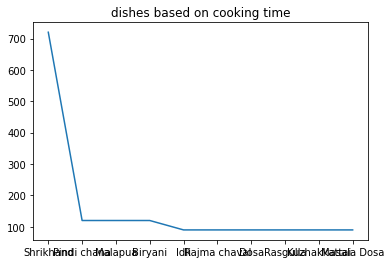

In [31]:
y=tencooking_time_longest['cook_time']
x=tencooking_time_longest['name']
plt.plot(x,y)
plt.title('dishes based on cooking time')
plt.show()